In [1]:
import pandas as pd
import numpy as np

In [2]:
h5 = pd.HDFStore("/home/pchatha/mimic/data/all_hourly_data.h5")

In [3]:
h5.keys()

['/codes',
 '/interventions',
 '/patients',
 '/vitals_labs',
 '/vitals_labs_mean',
 '/patients/meta/values_block_6/meta',
 '/patients/meta/values_block_5/meta',
 '/patients/meta/values_block_4/meta',
 '/patients/meta/values_block_0/meta']

In [4]:
h5["interventions"].head()

vent  vaso  adenosine  dobutamine  \
subject_id hadm_id icustay_id hours_in                                      
3          145834  211552     0            1     0          0           0   
                              1            1     1          0           0   
                              2            1     1          0           0   
                              3            1     1          0           0   
                              4            1     1          0           0   

                                        dopamine  epinephrine  isuprel  \
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0                0            0        0   
                              1                1            0        0   
                              2                1            0        0   
                              3                0            0        0   
                              4                0            0        0   

                                        milrinone  norepinephrine  \
subject_id hadm_id icustay_id hours_in                              
3          145834  211552     0                 0               0   
                              1                 0               0   
                              2                 0               0   
                              3                 0               0   
                              4                 0               1   

                                        phenylephrine  vasopressin  \
subject_id hadm_id icustay_id hours_in                               
3          145834  211552     0                     0            0   
                              1                     1            0   
                              2                     1            0   
                              3                     1            0   
                              4                     1            0   

                                        colloid_bolus  crystalloid_bolus  \
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0                     0                  0   
                              1                     0                  0   
                              2                     0                  0   
                              3                     0                  0   
                              4                     0                  0   

                                        nivdurations  
subject_id hadm_id icustay_id hours_in                
3          145834  211552     0                    0  
                              1                    0  
                              2                    0  
                              3                    0  
                              4                    0

In [17]:
dff = h5["interventions"].groupby(level=0)["vent"].diff()
dff = dff.fillna(0).reset_index()
dff["vent"] = np.abs(dff["vent"])

In [28]:
(h5["interventions"]["vaso"] == 1).reset_index().groupby("subject_id")["hours_in"].first().describe()

count    34472.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: hours_in, dtype: float64

In [21]:
dff.groupby("subject_id")["vent"].sum().describe()

count    34472.000000
mean         0.759863
std          1.125268
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: vent, dtype: float64

In [14]:
h5["interventions"].loc[3]

vent  vaso  adenosine  dobutamine  dopamine  \
hadm_id icustay_id hours_in                                                
145834  211552     0            1     0          0           0         0   
                   1            1     1          0           0         1   
                   2            1     1          0           0         1   
                   3            1     1          0           0         0   
                   4            1     1          0           0         0   
...                           ...   ...        ...         ...       ...   
                   141          0     0          0           0         0   
                   142          0     0          0           0         0   
                   143          0     0          0           0         0   
                   144          0     0          0           0         0   
                   145          0     0          0           0         0   

                             epinephrine  isuprel  milrinone  norepinephrine  \
hadm_id icustay_id hours_in                                                    
145834  211552     0                   0        0          0               0   
                   1                   0        0          0               0   
                   2                   0        0          0               0   
                   3                   0        0          0               0   
                   4                   0        0          0               1   
...                                  ...      ...        ...             ...   
                   141                 0        0          0               0   
                   142                 0        0          0               0   
                   143                 0        0          0               0   
                   144                 0        0          0               0   
                   145                 0        0          0               0   

                             phenylephrine  vasopressin  colloid_bolus  \
hadm_id icustay_id hours_in                                              
145834  211552     0                     0            0              0   
                   1                     1            0              0   
                   2                     1            0              0   
                   3                     1            0              0   
                   4                     1            0              0   
...                                    ...          ...            ...   
                   141                   0            0              0   
                   142                   0            0              0   
                   143                   0            0              0   
                   144                   0            0              0   
                   145                   0            0              0   

                             crystalloid_bolus  nivdurations  
hadm_id icustay_id hours_in                                   
145834  211552     0                         0             0  
                   1                         0             0  
                   2                         0             0  
                   3                         0             0  
                   4                         0             0  
...                                        ...           ...  
                   141                       0             0  
                   142                       0             0  
                   143                       0             0  
                   144                       0             0  
                   145                       0             0  

[146 rows x 14 columns]

AttributeError: 'SeriesGroupBy' object has no attribute 'abs'

In [6]:
h5["interventions"]["vent"]

subject_id  hadm_id  icustay_id  hours_in
3           145834   211552      0           1
                                 1           1
                                 2           1
                                 3           1
                                 4           1
                                            ..
99999       113369   246512      22          0
                                 23          0
                                 24          0
                                 25          0
                                 26          0
Name: vent, Length: 2200954, dtype: int64

In [5]:
c = h5["interventions"].reset_index()

In [111]:
c[c["vent"] == 1].groupby(["subject_id"]).first()["hours_in"].describe()

count    13410.000000
mean         7.102386
std         17.365600
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        228.000000
Name: hours_in, dtype: float64

In [103]:
h5["interventions"].reset_index().groupby("subject_id")["vent"].first()

subject_id
3        1
4        0
6        0
9        1
11       0
        ..
99983    0
99991    0
99992    0
99995    0
99999    0
Name: vent, Length: 34472, dtype: int64

Ventilation seems like a reasonably balanced treatment: 39% of patients are ventillated

In [5]:
treatment_status = h5["interventions"].groupby("subject_id")[["vaso", "vent"]].any().astype(int)
treatment_status.describe()

,vaso,vent
count,34472.000000,34472.000000
mean,0.303841,0.389011
std,0.459921,0.487533
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


subj_id, hadm_id, and icustay_id are 1-1

In [52]:
h5["codes"].reset_index().drop_duplicates(["subject_id", "hadm_id", "icustay_id"]).shape

(34472, 5)

In [53]:
h5["codes"].index.unique(level=0).shape

(34472,)

In [59]:
subj_codes = h5["codes"].groupby(level=[0])["icd9_codes"].first().explode()

In [62]:
diags = subj_codes.to_frame().join(treatment_status["vent"], how="right")

In [63]:
diags.head()

,icd9_codes,vent
subject_id,,
3,0389,1
3,78559,1
3,5849,1
3,4275,1
3,41071,1


In [14]:
# unique_diags = diags.reset_index()[["subject_id", "icd9_codes", "vent"]].drop_duplicates()

In [64]:
treated_code_counts = diags[diags["vent"] == 1]["icd9_codes"].value_counts()

In [65]:
control_code_counts = diags[diags["vent"] == 0]["icd9_codes"].value_counts()

In [67]:
diags.reset_index().groupby("vent")["subject_id"].nunique()

vent
0    21062
1    13410
Name: subject_id, dtype: int64

In [68]:
treated_code_counts.name = "freq"
control_code_counts.name = "freq"

In [69]:
code_prevalence = treated_code_counts.to_frame().join(control_code_counts, lsuffix="_treated", rsuffix="_control")

In [70]:
code_prevalence = code_prevalence.fillna(0)
code_prevalence["total_count"] = code_prevalence["freq_treated"] + code_prevalence["freq_control"]

In [71]:
code_prevalence["freq_treated"] = code_prevalence["freq_treated"] / 13410
code_prevalence["freq_control"] = code_prevalence["freq_control"] / 21062

In [76]:
top_code_prevalence = code_prevalence.sort_values("total_count", ascending=False)

In [77]:
top_code_prevalence["diff"] = top_code_prevalence["freq_treated"] - top_code_prevalence["freq_control"]

In [79]:
top_code_prevalence.head(10)

,freq_treated,freq_control,total_count,diff
4019,0.491051,0.397968,14967.0,0.093084
41401,0.378673,0.201928,9331.0,0.176745
42731,0.290157,0.207198,8255.0,0.082959
4280,0.219612,0.215364,7481.0,0.004248
2724,0.207905,0.154971,6052.0,0.052934
25000,0.195749,0.160004,5995.0,0.035746
5849,0.125354,0.176289,5394.0,-0.050935
2720,0.156152,0.111338,4439.0,0.044814
53081,0.124832,0.119884,4199.0,0.004948
5990,0.098732,0.123160,3918.0,-0.024428


In [82]:
pat = h5.patients.join(treatment_status["vent"], how="right")

In [87]:
pat["gender"].value_counts(normalize=True)

M    0.565502
F    0.434498
Name: gender, dtype: float64

In [86]:
pat.groupby("vent")["gender"].value_counts(normalize=True)

vent   
0     M    0.536511
      F    0.463489
1     M    0.611037
      F    0.388963
Name: gender, dtype: float64

In [98]:
pat.groupby("vent")["insurance"].value_counts(normalize=True)

vent  insurance 
0     Medicare      0.535847
      Private       0.336008
      Medicaid      0.083610
      Government    0.031004
      Self Pay      0.013531
1     Medicare      0.524310
      Private       0.355630
      Medicaid      0.076137
      Government    0.029605
      Self Pay      0.014318
Name: insurance, dtype: float64

In [99]:
pat.groupby("vent")["readmission_30"].mean()

vent
0    0.045722
1    0.039299
Name: readmission_30, dtype: float64

In [102]:
pat.groupby("vent")["mort_icu"].mean()

vent
0    0.034232
1    0.114840
Name: mort_icu, dtype: float64

In [100]:
pat.head()

,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours,vent
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,
3,145834,211552,M,WHITE,76.526792,Medicare,2101-10-20 19:08:00,HYPOTENSION,2101-10-31 13:58:00,SNF,1.0,0.0,...,6.064560,EMERGENCY,MICU,0,0,0,1,0,145,1
4,185777,294638,F,WHITE,47.845047,Private,2191-03-16 00:28:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",2191-03-23 18:41:00,HOME WITH HOME IV PROVIDR,1.0,0.0,...,1.678472,EMERGENCY,MICU,0,0,0,1,0,40,0
6,107064,228232,F,WHITE,65.942297,Medicare,2175-05-30 07:15:00,CHRONIC RENAL FAILURE/SDA,2175-06-15 16:00:00,HOME HEALTH CARE,1.0,0.0,...,3.672917,ELECTIVE,SICU,0,0,0,1,0,88,0
9,150750,220597,M,UNKNOWN/NOT SPECIFIED,41.790228,Medicaid,2149-11-09 13:06:00,HEMORRHAGIC CVA,2149-11-14 10:15:00,DEAD/EXPIRED,1.0,0.0,...,5.323056,EMERGENCY,MICU,1,1,1,1,0,127,1
11,194540,229441,F,WHITE,50.148295,Private,2178-04-16 06:18:00,BRAIN MASS,2178-05-11 19:00:00,HOME HEALTH CARE,1.0,0.0,...,1.584410,EMERGENCY,SICU,0,0,0,1,0,38,0


### Time-Varying Treatment

In [167]:
vitals = h5["vitals_labs_mean"].droplevel(['hadm_id', 'icustay_id'])

In [168]:
vitals.columns = vitals.columns.get_level_values(0)

In [169]:
vital_list = [
    'heart rate',
    'red blood cell count',
    'sodium',
    'mean blood pressure',
    'systemic vascular resistance',
    'glucose',
    'chloride urine',
    'glascow coma scale total',
    'hematocrit',
    'positive end-expiratory pressure set',
    'respiratory rate',
    'prothrombin time pt',
    'cholesterol',
    'hemoglobin',
    'creatinine',
    'blood urea nitrogen',
    'bicarbonate',
    'calcium ionized',
    'partial pressure of carbon dioxide',
    'magnesium',
    'anion gap',
    'phosphorous',
    'venous pvo2',
    'platelets',
    'calcium urine'
]

In [170]:
vitals = vitals[vital_list]

In [171]:
vitals = vitals.fillna(method="ffill")
vitals = vitals.fillna(method="bfill")

In [172]:
mean = np.mean(vitals, axis=0)
std = np.std(vitals, axis=0)
vitals = (vitals - mean) / std

<AxesSubplot:>

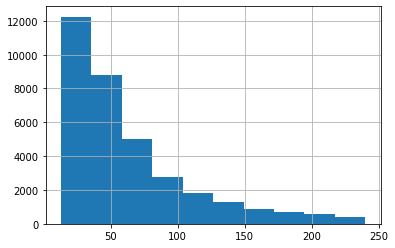

In [173]:
# consider filtering: 20-100 hours of data?
vitals.groupby("subject_id").size().hist()

In [140]:
seq_lengths = vitals.groupby("subject_id").size()

In [144]:
# dull
seq_lengths[(seq_lengths >= 16) & (seq_lengths <= 128)]

subject_id
4         41
6         89
9        128
11        39
13        88
        ... 
99983     25
99991     76
99992     48
99995     52
99999     27
Length: 30323, dtype: int64

In [174]:
vitals_int = vitals.join(treatment_status["vent"], how="right")

In [ ]:
vitals_int.head()

In [187]:
for vital in ["mean blood pressure", "heart rate", "respiratory rate", "glucose",
             "hematocrit", "hemoglobin", "platelets"]:
    print(vitals_int.groupby("vent")[vital].median().diff())

vent
0         NaN
1   -0.063676
Name: mean blood pressure, dtype: float64
vent
0        NaN
1    0.17184
Name: heart rate, dtype: float64
vent
0         NaN
1   -0.086911
Name: respiratory rate, dtype: float64
vent
0         NaN
1    0.081243
Name: glucose, dtype: float64
vent
0         NaN
1   -0.290617
Name: hematocrit, dtype: float64
vent
0         NaN
1   -0.220084
Name: hemoglobin, dtype: float64
vent
0         NaN
1   -0.233136
Name: platelets, dtype: float64


In [149]:
vitals.groupby("subject_id").nunique().median(axis=0)

LEVEL2
heart rate                              23.0
red blood cell count                     3.0
sodium                                   3.0
mean blood pressure                     27.0
systemic vascular resistance             1.0
glucose                                  8.0
chloride urine                           1.0
glascow coma scale total                 1.0
hematocrit                               5.0
positive end-expiratory pressure set     1.0
respiratory rate                        16.0
prothrombin time pt                      3.0
cholesterol                              1.0
hemoglobin                               4.0
creatinine                               3.0
blood urea nitrogen                      3.0
bicarbonate                              3.0
calcium ionized                          1.0
partial pressure of carbon dioxide       2.0
magnesium                                3.0
anion gap                                3.0
phosphorous                              3.0
ven

#### Explore

In [6]:
diags = h5["codes"]

In [9]:
diags.groupby("icustay_id")["icd9_codes"].last().apply(len)

icustay_id
200003     6
200007     7
200009     6
200014     9
200019     7
          ..
299987     7
299993     2
299995     5
299998    13
299999     2
Name: icd9_codes, Length: 34472, dtype: int64

In [33]:
b = diags.reset_index()
b["icd9_codes"] = b["icd9_codes"].apply(lambda x: ",".join(x))

In [35]:
b = b.reset_index().drop_duplicates(["icustay_id", "icd9_codes"])

In [36]:
b

,index,subject_id,hadm_id,icustay_id,hours_in,icd9_codes
0,0,3,145834,211552,0,"0389,78559,5849,4275,41071,4280,6826,4254,2639"
146,146,4,185777,294638,0,"042,1363,7994,2763,7907,5715,04111,V090,E9317"
187,187,6,107064,228232,0,"40391,4440,9972,2766,2767,2859,2753,V1582"
276,276,9,150750,220597,0,"431,5070,4280,5849,2765,4019"
404,404,11,194540,229441,0,1913
...,...,...,...,...,...,...
2200726,2200726,99983,117390,286606,0,"41001,5849,41401,60001,2724,4019,V4582,78820"
2200751,2200751,99991,151118,226241,0,"56211,0389,5570,5849,99592,56081,78959,5538,78..."
2200827,2200827,99992,197084,242052,0,"9999,56881,5772,2851,5849,5799,72992,53081,401..."
2200875,2200875,99995,137810,229633,0,"4414,42833,99812,2851,4241,25000,99811,9961,E8..."


In [44]:
diags.index.unique(level=2).shape

(34472,)